In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading csv file 
df = pd.read_csv("/mnt/c/Users/nites/Downloads/sales_performance_project/superstore_sales.csv", encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Exploratory Data analysis (EDA)

In [7]:
# displays total number of rows and columns on our dataset

df.shape

(9994, 21)

In [8]:
# displays the basic information about the dataset- datatype, total entries for all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
# displays the summary of numerical features in the dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# checks if there's any duplicates entries in the dataset

df.duplicated().any()

False

In [14]:
# checks if there's any missing values in the dataset in sorted order

df.isna().sum().sort_values(ascending=True)[:5]

Row ID        0
Order ID      0
Order Date    0
Ship Date     0
Ship Mode     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   object        
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

we can see that Order Date and Ship Date column got object datatype so we need to cast this with datetime.

In [19]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [29]:
# Basic KPIs
total_sales = df['Sales'].sum()
total_sales

2297200.8603000003

In [33]:
total_profit = df['Profit'].sum()
total_profit

286397.0217

In [37]:
total_order = df['Order ID'].nunique()
print(f"total orders: {total_order}")

total orders: 5009


In [38]:
# Total sales calculated by category

sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

In [39]:
sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

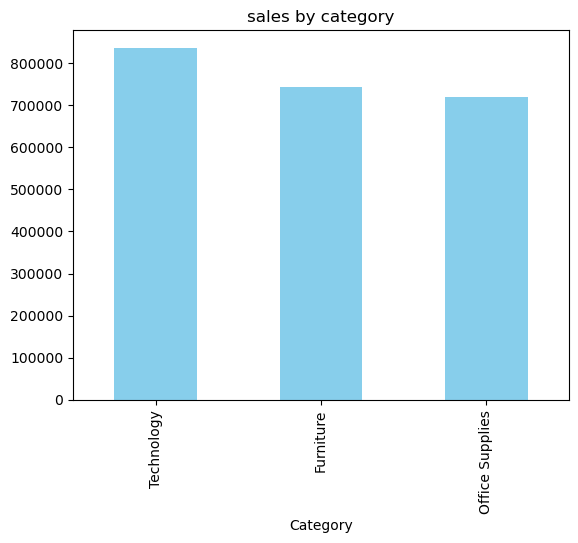

In [40]:
# lets plot a barchat to display the sales per feature categories
sales_by_category.plot(kind='bar', color='skyblue', title='sales by category')
plt.show()

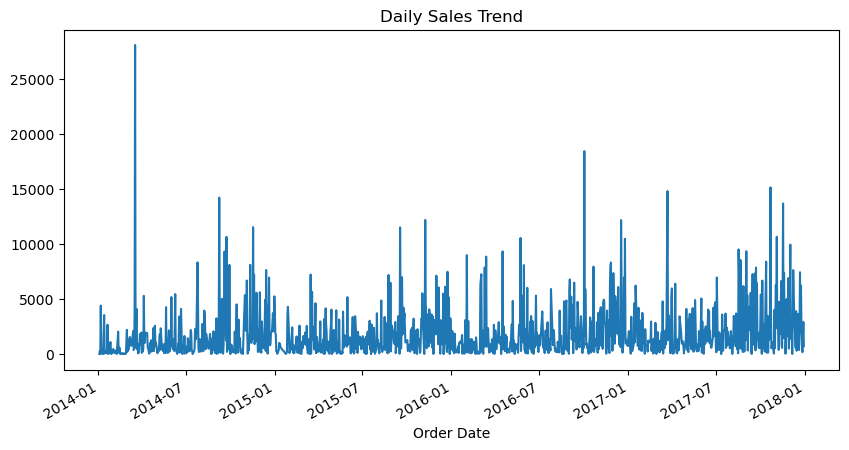

In [41]:
# Sales trend over time
df.groupby('Order Date')['Sales'].sum().plot(figsize=(10,5), title='Daily Sales Trend')
plt.show()

<AxesSubplot: ylabel='Sales'>

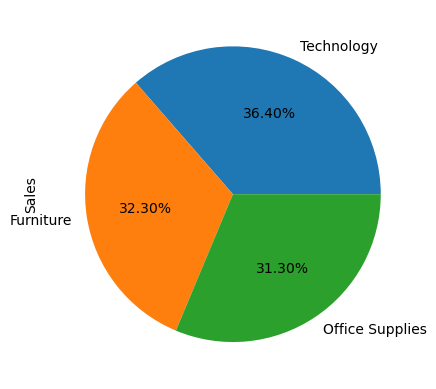

In [43]:
# lets do visualization using matplotlib 
sales_by_category.plot(kind='pie', autopct="%0.2f%%")

<AxesSubplot: xlabel='Segment'>

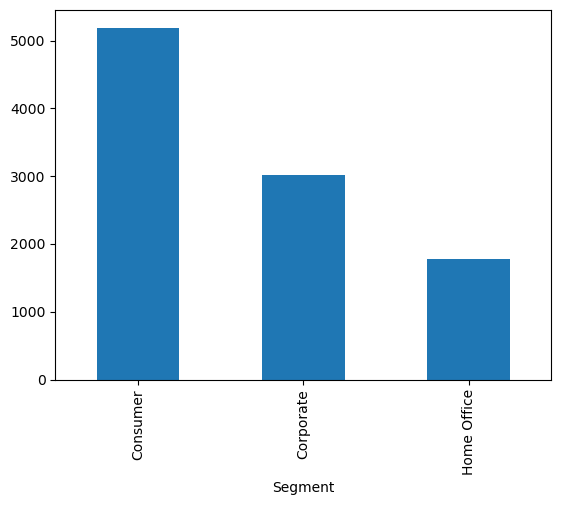

In [44]:
# lets visualize the segment feature using bar graph
df['Segment'].value_counts().plot(kind='bar')

In [46]:
# We have completed basic cleaning for our dataset. 
# let's save the cleaned dataset now
df.to_csv("/mnt/c/Users/nites/Downloads/sales_performance_project/cleaned_sales.csv")